This Kernel for someone want to deep dive into image classification. I use CNN for classification model. If you found this Kernel helpful please up vote it. If you have some feedback and question don't forget to comment below. 

I have simplier model with 
* https://www.kaggle.com/uysimty/get-start-image-classification

# Import Library

In [232]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img # 이미지 데이터의 배치를 생성, 이미지 전처리에 사용
from keras.utils import to_categorical # 여러 개의 Y값을 0과 1로만 이루어진 형태로 바꿔주는 one-hot-encoding
from sklearn.model_selection import train_test_split # scikit-learn 패키지 중 model_selection에 데이터 분할을 위한 train_test_split 함수가 있음.
import matplotlib.pyplot as plt
import random
import os # os.listdir을 쓰기 위해서
print(os.listdir("../input")) # input 디렉토리 내에 있는 모든 파일 및 디렉토리 '리스트'를 가져와서 indexing 한다.


['dogs-vs-cats']


# Define Constants

In [233]:
FAST_RUN = False # 아래에 사용됨
IMAGE_WIDTH=128 # 이미지 넓이(행)
IMAGE_HEIGHT=128 # 이미지 높이(열)
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # 이미지 channel(depth)

# Prepare Traning Data

In [234]:
filenames = os.listdir("../input/dogs-vs-cats/train/train") # os.listdir은 디렉토리 내에 있는 모든 파일 및 디렉토리 리스트를 가져와서 indexing 한다.
categories = [] # 빈 list 한 개 만든다.
for filename in filenames:              # filenames에 있는 list들을 한 개씩 받아온다.                       
    category = filename.split('.')[0]   # . 을 기준으로 나누고, '0'위치에 있는 것을 category 변수에 저장
    if category == 'dog':
        categories.append(1) # 강아지이면 1을 넣고 (append : 덧붙이다)
    else:
        categories.append(0) # 강아지가 아니면(고양이면) 0을 넣어라

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
}) # 데이터프레임 만들기 -  filename이라는 col에 filenames value 넣기, category라는 col에 categories value 넣기

In [235]:
filenames # 형태 보기
# 주의: filenames는 list이기 때문에 shape, head() attribute를 갖지 않음

['cat.5735.jpg',
 'dog.3986.jpg',
 'cat.6839.jpg',
 'dog.11033.jpg',
 'cat.11635.jpg',
 'dog.276.jpg',
 'dog.6895.jpg',
 'cat.8828.jpg',
 'cat.4261.jpg',
 'cat.1903.jpg',
 'cat.7070.jpg',
 'cat.8834.jpg',
 'cat.4329.jpg',
 'cat.11663.jpg',
 'cat.4168.jpg',
 'cat.3340.jpg',
 'dog.5013.jpg',
 'cat.12487.jpg',
 'cat.5374.jpg',
 'cat.5936.jpg',
 'cat.8100.jpg',
 'dog.12056.jpg',
 'dog.8693.jpg',
 'dog.10211.jpg',
 'cat.8003.jpg',
 'dog.3808.jpg',
 'dog.2995.jpg',
 'dog.6753.jpg',
 'cat.10297.jpg',
 'cat.8098.jpg',
 'dog.5293.jpg',
 'cat.7883.jpg',
 'cat.8267.jpg',
 'cat.6818.jpg',
 'dog.4054.jpg',
 'cat.4624.jpg',
 'dog.11177.jpg',
 'dog.6047.jpg',
 'cat.1514.jpg',
 'dog.404.jpg',
 'dog.7099.jpg',
 'cat.9721.jpg',
 'dog.85.jpg',
 'cat.4745.jpg',
 'dog.5221.jpg',
 'dog.1254.jpg',
 'dog.10823.jpg',
 'cat.7474.jpg',
 'cat.10104.jpg',
 'dog.9357.jpg',
 'cat.8930.jpg',
 'cat.7640.jpg',
 'cat.3372.jpg',
 'dog.4481.jpg',
 'dog.78.jpg',
 'cat.5227.jpg',
 'dog.2937.jpg',
 'dog.9403.jpg',
 'cat.1203

In [236]:
df.head() # filename이 무엇인지 알 수 있고 category가 잘 나뉘었는지도 확인 가능하다.

,filename,category
0,cat.5735.jpg,0
1,dog.3986.jpg,1
2,cat.6839.jpg,0
3,dog.11033.jpg,1
4,cat.11635.jpg,0


In [237]:
df.tail() # filename이 무엇인지 알 수 있고 category가 잘 나뉘었는지도 확인 가능하다. // 25000개의 data가 있음을 알 수 있다.

,filename,category
24995,dog.6021.jpg,1
24996,cat.7751.jpg,0
24997,cat.10232.jpg,0
24998,cat.10588.jpg,0
24999,cat.5816.jpg,0


### See Total In count

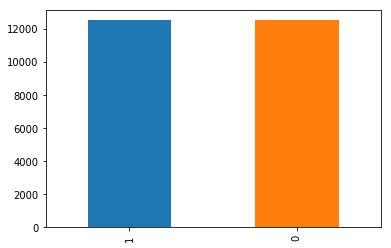

In [238]:
df['category'].value_counts().plot.bar()
# df 데이터프레임에 있는 category col에 있는 value들을 count 해서 bar plot을 그려라.
# 개와 고양이가 몇 마리씩 되는지 대략 알 수 있다.

![](http://)From our data we have 12500 cats and 12500 dogs

# See sample image

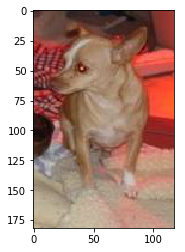

In [239]:
# random.choice를 사용하기 위해 위에서 import random을 사용.
# 내가 가지고 있던 디렉토리에 있는 list중에서 아무거나 1개 sampling한다
sample = random.choice(filenames)

# from keras.preprocessing.image import ImageDataGenerator, load_img를 쓴 이유
image = load_img("../input/dogs-vs-cats/train/train/"+sample)
plt.imshow(image) # matplotlib에서 이미지 불러옴

# Build Model

<img src="https://i.imgur.com/ebkMGGu.jpg" width="100%"/>

* **Input Layer**: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
* **Conv Layer**: This layer will extract features from image.
* **Pooling Layer**: This layerreduce the spatial volume of input image after convolution.
* **Fully Connected Layer**: It connect the network from a layer to another layer
* **Output Layer**: It is the predicted values layer. 

In [240]:
from keras.models import Sequential # sequential model은 layer를 선형으로 연결하여 구성한다. 
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
# ㄴ keras.layers에서 pooling, dropout등 cnn을 구성하는데 쓰이는 방법들을 import

model = Sequential() # 가장 자주 사용하는 구조인 층을 순서대로 쌓아 올린 네트워크{keras 사용 - 모델을 정의(생성)}


# Convolution
# 인공신경망 모델을 효율적으로 학습시키기 윈한 개선 방법들 (BatchNormalization, Dropout, ModelEnsemble)

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
# 32는 convolution filter 수 // (3,3): kernel_size. --> 즉, convolution kernel의 (행,열)
# activation function(활성화 함수)은 relu를 사용
# ㄴ sigmoid보다 relu 함수를 사용하는 이유: 신경망이 깊어 질수록 학습이 어렵기 때문에 전체 계층을 한번 계산한 후 그 계산된 값을 다시 계산하는
#    역전파(Back Propagation)이라는 방법을 사용하는데 sigmoid함수를 activation function으로 사용할 경우, 계층이 깊어지면 Gradient Vanishing(그라디언트 소실)문제가
#    발생하기 때문에 relu 함수를 사용한다.

# 만들어진 모델은 입력 형태에 대한 정보가 필요하기에 Sequential model의 첫 번째 layer는 입력 형태에 대한 정보를 받아야한다.
# 두 번째 이후의 layer들은 자동으로 형태를 추정할 수 있기에 input_shape문을 쓸 필요가 없다.
# input_shape에는 batch dimension은 포함되지 않는다.

model.add(BatchNormalization()) # 인공신경망에 입력값을 평균0, 분산1로 정규화해서 네트워크의 학습이 잘 일어나도록 돕는다.
model.add(MaxPooling2D(pool_size=(2, 2))) # 2 by 2 filter로 max pooling
model.add(Dropout(0.25)) # 과적합을 방지하기 위해 activation을 0.25의 확률로 지워버린다.



model.add(Conv2D(64, (3, 3), activation='relu')) # filter수가 늘어남
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))



model.add(Conv2D(128, (3, 3), activation='relu')) # filter수가 더 늘어남
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))



model.add(Flatten()) # - 이 층에는 학습되는 가중치가 없고 데이터를 변환하기만 한다.(1차원 vector으로 바꿈)
                     # - 이 층은 하나의 layer에 있는 모든 neuron을 또 다른 layer의 모든 neuron과 연결 시켜준다.
model.add(Dense(512, activation='relu')) # dense로 층을 쌓음 - 첫번째 Dense층은 512개의 노드를 가짐
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2: because we have cat and dog classes
                                          # 마지막 층은 2개의 노드의 소프트맥스층 : 이 층은 2개의 확률을 반환하고 반환된 값의 전체 합은 1이다. 
                                          # 각 노드는 현재 이미지가 2개 클래스 중 하나에 속할 확률을 출력

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 
# 컴파일 단계 : 학습과정 설정, categorical_crossentropy(손실함수, 가중치 텐서를 학습하기 위한 피드백 신호로 사용되며 훈련하는 동안 최소화 된다.
#                                                     미니 배치 확률적 경사 하강법을 통해 손실이 감소됨.)
# optimizer : 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정
# rmsprop: 과거의 모든 기울기를 균일하게 더하지 않고 새로운 기울기의 정보만 반영하도록 해서 학습률이 크게 떨어져 0에 가까워지는 것을 방지하는 방법이다.



model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_21 (Batc (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_22 (Batc (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 64)        0         
__________

# Callbacks

In [241]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau # 학습 조기종료를 사용하기 위해 import

**Early Stop**

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [242]:
# 학습 횟수(=epoch수)가 많을수록 학습 데이터에 관한 오차는 작아지지만 이것이 overfitting을 초래해서 모델의 "일반화" 성능이 떨어지게 된다.
# 이전 epoch때와 비교해서 '오차가 증가했다면' 학습을 중단한다 라는 방법인데,
# 주의할점: 오차값은 각 epoch마다 올라가기도 하고 내려가기도 하며, dropout을 적용한 경우에는 아직 학습이 되지 않은
# 뉴런이 존재할 가능성이 있기 때문에 오차값이 상하로 움직이게 된다.
# 따라서 "어떤 일정한 epoch수를 거듭하면서 계속해서 오차가 증가하면 학습을 중단한다"는 방식으로 구현해야한다.
# 아래의 예시를 보면 patience는 오차가 증가하는 즉, "개선이 없는 epoch수"가 patience에 지정된 수만큼 지속될 경우 학습을 종료시킬때 사용

# 모델을 학습시키기 전에 다음과 같이 선언한다. 그다음 아래에 code를 보면 model.fit()이 있는데 callbacks=early_stopping을 사용하면 된다.
# EarlyStopping은 callback함수이다.
# callback함수: 어떤 함수를 수행 시 그 함수에서 내가 지정한 함수를 호출하는 것

earlystop = EarlyStopping(patience=10) # 학습 조기종료를 뜻함 -> overfitting을 막기 위해서 10epoch 만큼 거슬러 올라가 볼 때 
                                       # "validation loss값이 감소하지 않으면 학습을 중단하라." 라는 뜻이다.

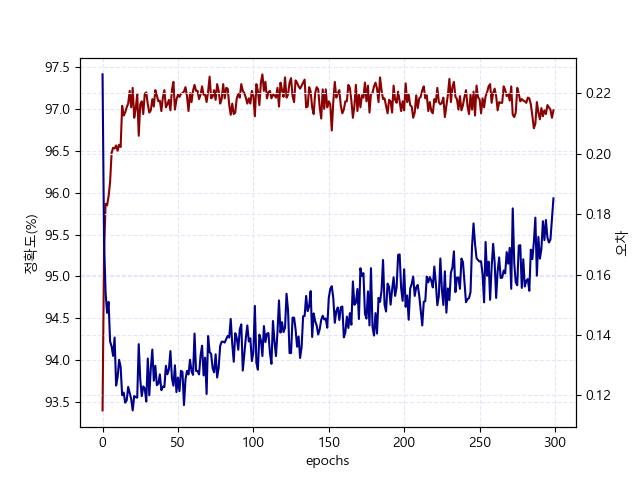

![python image2](https://tykimos.github.io/warehouse/2017-7-9-Early_Stopping_1.png)

![python image2](https://tykimos.github.io/warehouse/2017-7-9-Early_Stopping_4.png)

In [243]:
earlystop

**Learning Rate Reduction**

We will reduce the learning rate when then accuracy not increase for 2 steps

In [244]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# 모델은 학습이 정체되면 학습 속도를 2-10배 감소시키는 '이점'이 있다. -  학습이 정체된다????
# 이때, ReuceLROnplateau는 수량을 모니터링하며 patience수의 epoch수가 '개선되지 않으면'학습률이 감소시킨다.
# monitor : 모니터링 할 수량 (val_acc : validation accuracy)
# patience : 학습률이 감소한 후 개선되지 않은 epoch 수
# verbose : 얼마나 자세하게 정보를 표시할 것인가를 지정한다.(0 ~ 1)
# factor: 학습률이 감소하는 요인???
# min_lr : 학습률의 하한

In [245]:
callbacks = [earlystop, learning_rate_reduction] # callback에 2개의 함수를 저장

In [246]:
callbacks

# Prepare data

Because we will use image genaretor `with class_mode="categorical"`. We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification. 

So we will convert 1 to dog and 0 to cat

In [247]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

# replace를 이용해서 0은 cat으로 1은 dog로 바꿔라.
# 이유: image generator를 사용할 것이기 때문이고,
#       image generator는 classification에 적합한 one-hot encoding을 변환한다.

In [248]:
df.head() # category 확인

,filename,category
0,cat.5735.jpg,cat
1,dog.3986.jpg,dog
2,cat.6839.jpg,cat
3,dog.11033.jpg,dog
4,cat.11635.jpg,cat


In [249]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
# df: 분할시킬 data (DataFrame)
# test_size: test dataset의 비율이나 갯수(default=0.25) -> 여기서는 validation set이라 할 수 있다.
# random state: 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값
# shuffle: 셔플여부설정 (default=True)

train_df = train_df.reset_index(drop=True) # index를 reset함 -> drop: index로 세팅한 열을 데이터프레임내에서 삭제할지 여부를 결정한다.
validate_df = validate_df.reset_index(drop=True)

In [250]:
train_df.head() # 제가 해본 건데, 위에 있는 code를 실행시키면 random_state가 시드값이어서 고정 되어있기 때문에
#                 head()를 보면 계속 같은값으로 나오지만 shuffle default가 True여서, random_state를 빼면 head()가
#                 계속 바뀌는걸 확인 했어요.

,filename,category
0,dog.8528.jpg,dog
1,dog.3230.jpg,dog
2,dog.12260.jpg,dog
3,cat.7262.jpg,cat
4,dog.6360.jpg,dog


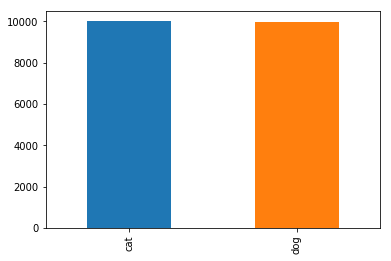

In [251]:
train_df['category'].value_counts().plot.bar() # train set의 cat과 dog의 빈도수를 plot으로 그림

In [252]:
validate_df.head()

,filename,category
0,dog.8816.jpg,dog
1,cat.3585.jpg,cat
2,cat.2335.jpg,cat
3,cat.1932.jpg,cat
4,dog.11829.jpg,dog


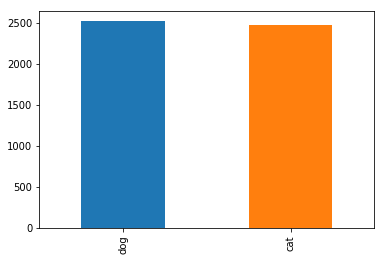

In [253]:
validate_df['category'].value_counts().plot.bar() # validation set의 cat과 dog의 빈도수로 plot을 그림

In [254]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [255]:
# 제가 뭔지 확인해 본거에요.
print(train_df.shape) 
print(validate_df.shape) 

(20000, 2)
(5000, 2)


# Traning Generator

In [256]:
# 신경망 모델의 성능을 높이기 위한 위한 "데이터 부풀리기(Data augmentation)"
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
# rotation_range : 지정된 각도 "범위"내에서 임의로 원본이미지를 회전시킨다. // 단위:(도) -> 여기서는 15니까, 0도에서 15도 사이
# rescale : byte와 관련이 있는듯 255라는 숫자가
# shear_range : 밀림 강도 범위내에서 임의로 원본이미지를 변형시킴

# zoom_range : 지정된 확대/축소 범위내에서 임의로 원본이미지를 확대/축소. “1 - 수치”부터 “1 + 수치”사이 범위로 확대/축소.
#              예를 들어 0.2이라면, 0.8배에서 1.2배 크기 변화를 시킵니다.

# horizontal_flip : 수평방향으로 뒤집느냐 마느냐

# width_shift_range : 지정된 "수평방향" 이동 범위내에서 임의로 원본이미지를 이동시킴. 수치는 "전체 넓이"의 비율(실수)로 나타냄.
#                     예를 들어 0.1이고 전체 넓이가 100이면, 10픽셀 내외로 "좌우" 이동.

# height_shift_range : 지정된 "수직방향" 이동 범위내에서 임의로 원본이미지를 이동시킴. 수치는 "전체 높이"의 비율(실수)로 나타냄..
#                       예를 들어 0.1이고 전체 높이가 100이면, 10픽셀 내외로 "상하" 이동.


# 'dataframe'과 '디렉토리'의 위치를 전달받아 증강/정규화된 데이터의 "배치"를 생성.
train_generator = train_datagen.flow_from_dataframe( 
    train_df, # DataFrame (전체 중에 80%만 있음)
    "../input/dogs-vs-cats/train/train/", # 문자열, 이미지를 읽을 '디렉토리'의 경로 (전체 data가 있음) 
    x_col='filename', # train_df 데이터프레임에 filename col의 값들을 가져옴
    y_col='category', # train_df 데이터프레임에 category col의 값들을 가져옴
    target_size=IMAGE_SIZE, # 
    class_mode='categorical', # 2D numpy array of one-hot encoded labels. Supports multi-label output.
    batch_size=batch_size # batch size
)

# ㄴ 20000개의 image가 발견됨. (25000개 중에서 80%인 20000개)

Found 20000 images belonging to 2 classes.


In [257]:
train_datagen

In [258]:
train_generator

### Validation Generator

In [259]:
# 위에 train_datagen과는 다르게 rescale만 해줌. (검증하는 거니까!)
# rescale 하는 이유: 정규화 과정임. image가 0~255까지 값을 가지는 2차원 배열인데, 0~255 사이의 값을
#                   0.0과 1.0사이의 값으로 바꾸기 위함이다.
#                   활성화함수 및 오류역전파 알고리즘은 0.0과 1.0사이의 값을 좋아하기 때문이다.
validation_datagen = ImageDataGenerator(rescale=1./255)

# 위에 있는 train_generator와 같다
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "../input/dogs-vs-cats/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

# 25000개 중에 20%는 5000개

Found 5000 images belonging to 2 classes.


# See how our generator work

In [260]:
example_df = train_df.sample(n=1).reset_index(drop=True) # train set인 train_df에서 1개를 sample함

# 1개만 가지고 example_generator를 만듦
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "../input/dogs-vs-cats/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

# 1개만 샘플했으므로 1개의 class에만 속함

Found 1 images belonging to 1 classes.


In [261]:
example_df # 뭐가 뽑혔는지 봤어요.

,filename,category
0,cat.1629.jpg,cat


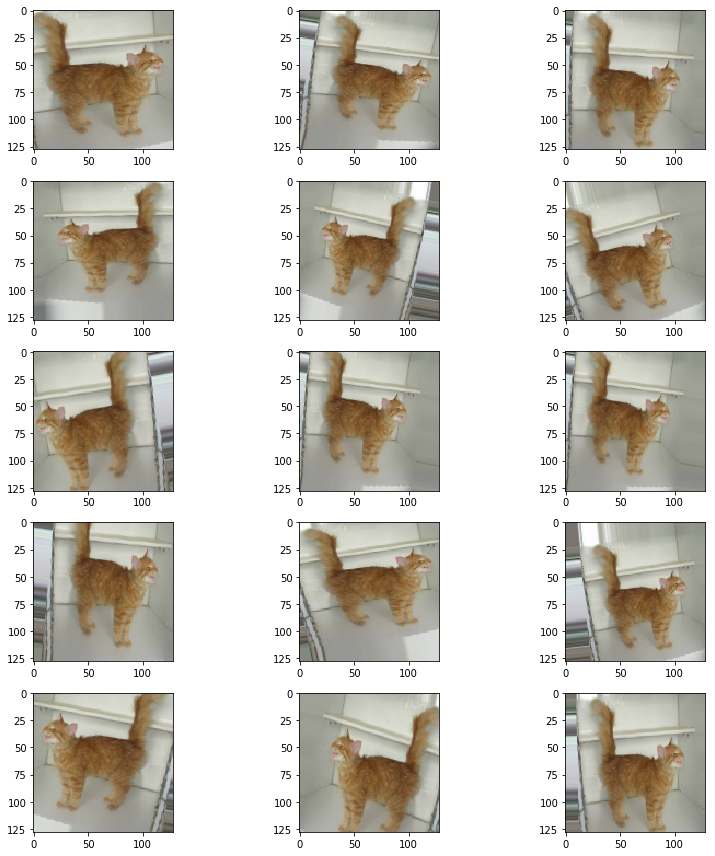

In [262]:
plt.figure(figsize=(12, 12)) # plot 출력 크기
for i in range(0, 15):
    plt.subplot(5, 3, i+1) # 5행 3열로 맞춤 i+1은 위치를 뜻함
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [263]:
X_batch.shape # 128행 128열 channel:3인 3차원 데이터

(1, 128, 128, 3)

In [264]:
X_batch[0] # 0번째 data 전체를 뜻함 -> 128행 128열 3channel형태의 1개의 data

array([[[0.47450984, 0.454902  , 0.43921572],
        [0.47450984, 0.454902  , 0.43921572],
        [0.47450984, 0.454902  , 0.43921572],
        ...,
        [0.5697975 , 0.5815622 , 0.53842497],
        [0.5700201 , 0.5817848 , 0.53864753],
        [0.57024276, 0.58200747, 0.5388702 ]],

       [[0.47450984, 0.454902  , 0.43921572],
        [0.47450984, 0.454902  , 0.43921572],
        [0.47450984, 0.454902  , 0.43921572],
        ...,
        [0.5764706 , 0.5882353 , 0.54509807],
        [0.5764706 , 0.5882353 , 0.54509807],
        [0.5764706 , 0.5882353 , 0.54509807]],

       [[0.47450984, 0.454902  , 0.43921572],
        [0.47450984, 0.454902  , 0.43921572],
        [0.47450984, 0.454902  , 0.43921572],
        ...,
        [0.5764706 , 0.5882353 , 0.54509807],
        [0.5764706 , 0.5882353 , 0.54509807],
        [0.57656157, 0.5883263 , 0.545189  ]],

       ...,

       [[0.5262009 , 0.49518454, 0.4577515 ],
        [0.5245313 , 0.49329233, 0.45597064],
        [0.5228617 , 0

In [265]:
X_batch[0,1] # 0번째 데이터의 1번째 행

array([[0.47450984, 0.454902  , 0.43921572],
       [0.47450984, 0.454902  , 0.43921572],
       [0.47450984, 0.454902  , 0.43921572],
       [0.47450984, 0.454902  , 0.43921572],
       [0.47450984, 0.454902  , 0.43921572],
       [0.47450984, 0.454902  , 0.43921572],
       [0.47450984, 0.454902  , 0.43921572],
       [0.47450984, 0.454902  , 0.43921572],
       [0.47450984, 0.454902  , 0.43921572],
       [0.47450984, 0.454902  , 0.43921572],
       [0.6208534 , 0.60875034, 0.58931166],
       [0.8991471 , 0.8958206 , 0.8759152 ],
       [0.7123982 , 0.7186124 , 0.7004324 ],
       [0.76436514, 0.7800514 , 0.783973  ],
       [0.9607844 , 0.97647065, 0.9803922 ],
       [0.97593427, 0.9894563 , 0.99121356],
       [0.9829734 , 0.9973691 , 1.        ],
       [0.9958804 , 0.99298084, 1.        ],
       [1.        , 0.9921569 , 1.        ],
       [0.9998906 , 0.9920475 , 1.        ],
       [0.9966546 , 0.9888115 , 1.        ],
       [1.        , 0.9921569 , 1.        ],
       [1.

In [266]:
X_batch # data가 1개입니다.

array([[[[0.47450984, 0.454902  , 0.43921572],
         [0.47450984, 0.454902  , 0.43921572],
         [0.47450984, 0.454902  , 0.43921572],
         ...,
         [0.5697975 , 0.5815622 , 0.53842497],
         [0.5700201 , 0.5817848 , 0.53864753],
         [0.57024276, 0.58200747, 0.5388702 ]],

        [[0.47450984, 0.454902  , 0.43921572],
         [0.47450984, 0.454902  , 0.43921572],
         [0.47450984, 0.454902  , 0.43921572],
         ...,
         [0.5764706 , 0.5882353 , 0.54509807],
         [0.5764706 , 0.5882353 , 0.54509807],
         [0.5764706 , 0.5882353 , 0.54509807]],

        [[0.47450984, 0.454902  , 0.43921572],
         [0.47450984, 0.454902  , 0.43921572],
         [0.47450984, 0.454902  , 0.43921572],
         ...,
         [0.5764706 , 0.5882353 , 0.54509807],
         [0.5764706 , 0.5882353 , 0.54509807],
         [0.57656157, 0.5883263 , 0.545189  ]],

        ...,

        [[0.5262009 , 0.49518454, 0.4577515 ],
         [0.5245313 , 0.49329233, 0.45597064]

In [267]:
print(Y_batch)
print(Y_batch.shape)

[[1.]]
(1, 1)


Seem to be nice 

# Fit Model

In [ ]:
epochs=7 if FAST_RUN else 7 # FAST_RUN은 mode 같은데 구글링해도 잘 안나오네요. else 뒤에 숫자를 바꾸는대로 Epoch가 변하는 건 확인했어요
                            # 위에서 False로 값을 지정했어요.
history = model.fit_generator( # keras에서는 모델을 학습시킬 때 주로 fit 함수를 사용하지만 generator로
                               # 생성된 batch로 학습시킬 경우에는 fit_generator() 함수를 사용
    train_generator, # 훈련 dataset을 제공할 generator를 지정. 앞서 생성한 train_generator로 지정.
    epochs=epochs,   # 전체 훈련 dataset에 대해 학습 반복 횟수를 지정.
    validation_data=validation_generator, # validation_data에 검증 dataset을 제공한 generator를 지정.
    validation_steps=total_validate//batch_size, # validation_steps: 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정.
                                                 # 위에서 total_validate는 val의 data 수.
    
    steps_per_epoch=total_train//batch_size,     # steps_per_epoch: 한 epoch에 사용한 step수 // step???
                                                 # total_train은 train의 data 수.
    
    callbacks=callbacks                          # 위에서 지정한 callbacks함수 불러옴
)

Epoch 1/7
1333/1333 [==============================] - 216s 162ms/step - loss: 0.7480 - acc: 0.6322 - val_loss: 0.7603 - val_acc: 0.6312
Epoch 2/7
1333/1333 [==============================] - 214s 161ms/step - loss: 0.5587 - acc: 0.7223 - val_loss: 0.5119 - val_acc: 0.7587
Epoch 3/7
1333/1333 [==============================] - 219s 164ms/step - loss: 0.5032 - acc: 0.7633 - val_loss: 0.4130 - val_acc: 0.8142
Epoch 4/7
1333/1333 [==============================] - 224s 168ms/step - loss: 0.4647 - acc: 0.7840 - val_loss: 0.4600 - val_acc: 0.7944
Epoch 5/7
1333/1333 [==============================] - 219s 164ms/step - loss: 0.4359 - acc: 0.7996 - val_loss: 0.4602 - val_acc: 0.8154
Epoch 6/7
1015/1333 [=====================>........] - ETA: 47s - loss: 0.4168 - acc: 0.8121

# Save Model

In [ ]:
# 한번 training을 할 때 대용량 데이터를 트레이닝 한 뒤 model을 save하지 않으면 다시 처음부터
# 트레이닝을 진행해야한다.
model.save_weights("model.h5") # weight를 h5 파일 포맷으로 만들어 저장하기
                               # keras에서는 모델과 weights의 재사용을 위해 이를 파일형태로 저장하는 라이브러리를 제공하며,
                               # 이를 통해 모델과 weights를 파일 형태로 저장하고 불러올 수가 있다.

# Virtualize Training

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12)) # 양쪽에 그래프를 출력 하겠다. 2행 1열로 하고 사이즈 조정.
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Prepare Testing Data

In [ ]:
test_filenames = os.listdir("../input/dogs-vs-cats/test/test") # test에 있는 list들을 가져옴
test_df = pd.DataFrame({                                       # 데이터프레임을 생성
    'filename': test_filenames                                 # filename이라는 col에 test_filenames값을 가져옴
})
nb_samples = test_df.shape[0] # test dataset data 갯수

In [ ]:
test_df.shape

# Create Testing Generator

In [ ]:
# rescale만 해줌. (검증하는 거니까!)
# rescale 하는 이유: 정규화 과정임. image가 0~255까지 값을 가지는 2차원 배열인데, 0~255 사이의 값을
#                   0.0과 1.0사이의 값으로 바꾸기 위함이다.
#                   활성화함수 및 오류역전파 알고리즘은 0.0과 1.0사이의 값을 좋아하기 때문이다.
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "../input/dogs-vs-cats/test/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

# shuffle을 쓰지 않음

# Predict

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
# test_generator 자리 : 입력 샘플의 batch를 생성하는 생성기
# steps : 중지되기 전까지 generator로부터 얻는 단계의 총 갯수 (샘플의 batch) , np.ceil로 '올림'함


For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [ ]:
predict

In [ ]:
test_df

In [ ]:
np.argmax(predict, axis=-1)

In [ ]:
test_df['category'] = np.argmax(predict, axis=-1) # axis에 해당하는 값들 중 가장 큰 값의 인덱스들을 반환하는 함수

In [ ]:
test_df['category']

We will convert the predict category back into our generator classes by using `train_generator.class_indices`. It is the classes that image generator map while converting data into computer vision

In [ ]:
dict((v,k) for k,v in train_generator.class_indices.items())

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map) # test_df['category'] 값을 0 or 1을 cat or dog로 바꿈

From our prepare data part. We map data with `{1: 'dog', 0: 'cat'}`. Now we will map the result back to dog is 1 and cat is 0

In [ ]:
test_df

In [ ]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

In [ ]:
test_df

### Virtaulize Result

In [ ]:
test_df['category'].value_counts().plot.bar()

### See predicted result with images

In [ ]:
test_df.head(18)

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows(): #iterrows row별로 반환해서 처리
    filename = row['filename']
    category = row['category']
    img = load_img("../input/dogs-vs-cats/test/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
sample_test.head()

# Submission

In [ ]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)